In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score


Read Dataset from CSV File

In [3]:
df=pd.read_csv(r'D:\\numericl_dataset\Salary.csv')
# test_data = pd.read_csv(r'test.csv')
categorical_columns = df.select_dtypes(include=['object']).columns

Preproccessing 

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [5]:
df.dropna(inplace=True)

In [6]:
missing_values = df.isnull().sum()
filtered_missing_values = missing_values[missing_values > 2]
print(filtered_missing_values)

Series([], dtype: int64)


In [7]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


In [9]:
df.shape

(6684, 9)

<Axes: >

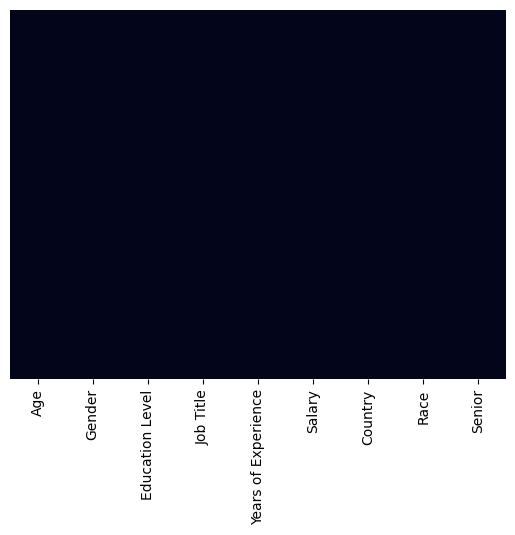

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

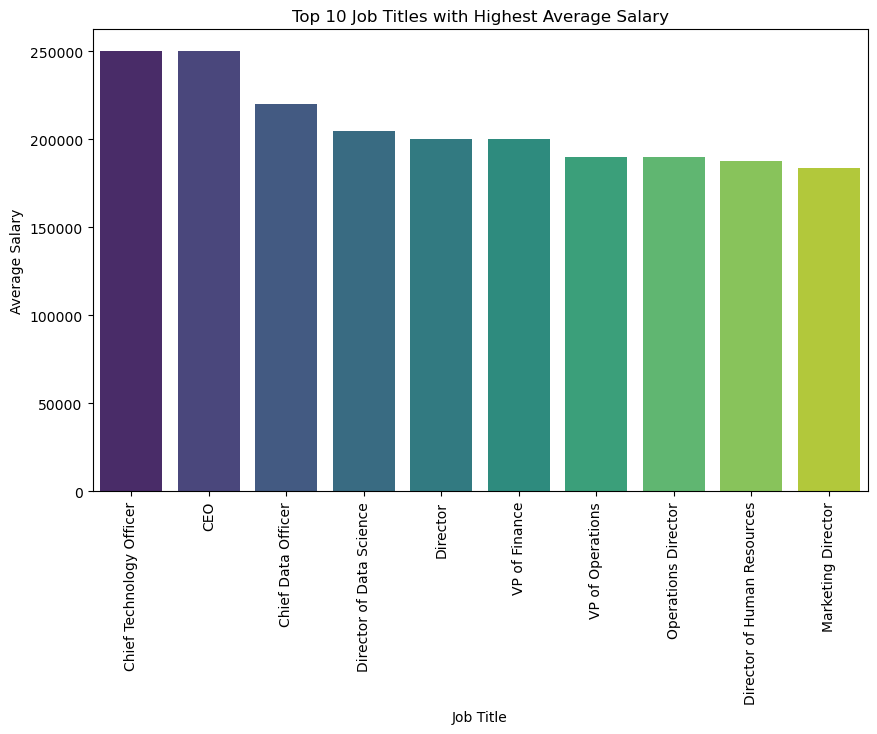

In [52]:
# Calculate average salary for each job title
average_salary_by_job = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)

# Select top 10 job titles with highest average salary
top_10_jobs = average_salary_by_job[:10]

# Plot the average salary for top 10 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_jobs.index, y=top_10_jobs.values, palette="viridis")
plt.title('Top 10 Job Titles with Highest Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

In [11]:
df['Years of Experience'] = df['Years of Experience'].replace(0, 1)

In [54]:
# columns_to_encode = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race', 'Senior']

# # Label Encoding
# label_encoder = LabelEncoder()
# df[columns_to_encode] = df[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))
# Define preprocessor without one-hot encoding 'Job Title'
# Define preprocessor

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', ['Years of Experience', 'Age']),
#         ('cat', OneHotEncoder(drop='first'), ['Gender', 'Country', 'Race', 'Job Title']),
#         ]
# )

# # Apply preprocessing to the dataset
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', ['Years of Experience', 'Age']),
#         ('cat', OneHotEncoder(drop='first'), ['Gender', 'Country', 'Race', 'Job Title']),
#         ]
# )

# # Apply preprocessing to the dataset
# df_preprocessed = preprocessor.fit_transform(df)

# # The output is a numpy array, convert it back to dataframe
# df_preprocessed = pd.DataFrame(df_preprocessed)

# # Display the first few rows of the preprocessed dataframe
# df_preprocessed.head()


In [12]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', ['Years of Experience', 'Age', 'Salary']),
#         ('cat', OneHotEncoder(drop='first'), ['Gender', 'Country', 'Race']),
#     ], remainder='drop', sparse_threshold=0)

# # Apply preprocessing to the dataset
# df_preprocessed = preprocessor.fit_transform(df)

# # Get feature names after one-hot encoding (excluding 'Job Title')
# one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=['Gender', 'Country', 'Race'])

# # Get all feature names
# feature_names = np.concatenate([one_hot_feature_names, ['Years of Experience', 'Age', 'Education Level', 'Salary']])

# # Convert the numpy array to dataframe
# df_preprocessed = pd.DataFrame(df_preprocessed, columns=feature_names)

# # Append 'Job Title' column to the preprocessed dataframe
# df_preprocessed['Job Title'] = df['Job Title']

# # Display the first few rows of the preprocessed dataframe
# df_preprocessed.head()


In [13]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


Feature Extraction

In [14]:
# Example code
df['SalaryPerExperience'] = df['Salary'] / df['Years of Experience']

numeric_columns = ['Age', 'Education Level', 'Years of Experience', 'Salary', 'Senior']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
missing_values = df.isnull().sum()
filtered_missing_values = missing_values[missing_values > 0]
print(filtered_missing_values)

Series([], dtype: int64)


Features Extraction


Salary per Experience

In [15]:
# Example code in Python using pandas
bins = [0, 25, 40, 60, float('inf')]
labels = ['1', '2', '3', '4']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [59]:
#label_encoder = LabelEncoder()
#df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

Dataset Split to train and test 

In [16]:
df_encoded = pd.get_dummies(df, columns=categorical_columns,dtype=int)

y_train = df_encoded['Salary']
x_train = df_encoded.drop(['Salary'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.3,  random_state=42)


Linear Regression Model

In [17]:
# #scaling the data using standard scaler
# scaler=StandardScaler()
# x_train_scaled=scaler.fit_transform(x_train)
# x_test_scaled=scaler.transform(x_test)


# # Create and train the model
# model =  Ridge(alpha=0.5)
# model.fit(x_train_scaled,y_train)


# #copute scores
# print('training accuracy ',model.score(x_train_scaled,y_train))
# print('test accuracy',model.score(x_test_scaled,y_test))

KNN Model

In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd

# Assuming x_train, x_test, y_train, and y_test are already defined

# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a modified parameter grid with alpha values
param_grid = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance', 'median'], # Add median to the grid
    'p': [1, 2],
    'leaf_size': [20, 30, 40]
}

# Create KNeighborsRegressor model
KNN_model = KNeighborsRegressor()

# Define a custom weight function that uses the median
def median_weights(distances):
    # Sort the distances and get the indices
    sorted_indices = np.argsort(distances)
    # Get the middle half of the indices
    middle_half = sorted_indices[len(distances)//4:len(distances)*3//4]
    # Create an array of weights with zeros
    weights = np.zeros(len(distances))
    # Assign equal weights to the middle half
    weights[middle_half] = 1 / len(middle_half)
    return weights

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(KNN_model, param_grid, cv=10)  # Increase the number of folds
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from grid search
best_KNN_model = grid_search.best_estimator_

# Evaluate the model using cross-validation with more folds
cv_scores = cross_val_score(best_KNN_model, x_train_scaled, y_train, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Print training and test accuracy
train_accuracy = best_KNN_model.score(x_train_scaled, y_train)
test_accuracy = best_KNN_model.score(x_test_scaled, y_test)
print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)




c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\DELL\anaconda3\Lib\site-packages\sk

Best Hyperparameters: {'leaf_size': 20, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Cross-Validation Scores: [0.8463021  0.79514088 0.86827968 0.83492196 0.86668084 0.85677041
 0.86400875 0.8745477  0.83644825 0.83606451]
Mean CV Score: 0.8479165076795644
Training accuracy: 1.0
Test accuracy: 0.8560162464597635


In [26]:
#scaling the data using standard scaler
StandardScaler=StandardScaler()
x_train_scaled=StandardScaler.fit_transform(x_train)
x_test_scaled=StandardScaler.transform(x_test)


# Create and train the model
KNN_model = KNeighborsRegressor(n_neighbors=25)
KNN_model.fit(x_train_scaled,y_train)


#copute scores
print('training accuracy ',KNN_model.score(x_train_scaled,y_train))
print('test accuracy',KNN_model.score(x_test_scaled,y_test))

training accuracy  0.7337974318624778
test accuracy 0.7116226194519066


Create New dataset file  

In [19]:
df.to_csv('formulatedtest.csv',index=False)